# 1. Tải và Làm sạch dữ liệu

1.1 Tải và hiển thị dữ liệu

In [2]:
import pandas as pd
f = pd.ExcelFile('C:/Users/DELL/OneDrive/Tài liệu/Study/Market Basket Analysis/Assignment-1_Data.xlsx')
df = pd.read_excel(f)

In [3]:
#In 5 dòng đầu df
print(df.head())

   BillNo                             Itemname  Quantity                Date  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1  536365                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2  536365       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3  536365  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4  536365       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   

   Price  CustomerID         Country  
0   2.55     17850.0  United Kingdom  
1   3.39     17850.0  United Kingdom  
2   2.75     17850.0  United Kingdom  
3   3.39     17850.0  United Kingdom  
4   3.39     17850.0  United Kingdom  


1.2 Làm sạch dữ liệu

In [4]:
#Liệt kê các giá trị trống
df.isnull().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

In [5]:
#Loại bỏ dữ liệu có số lượng âm hoặc bằng 0 (Ko có giá trị phân tích)
df=df.loc[df['Quantity']>0]

In [6]:
#Loại bỏ dữ liệu có giá âm hoặc bằng 0
df=df.loc[df['Price']>0]

In [7]:
#Loại bỏ những dữ liệu không phải sản phẩm
df=df.loc[(df['Itemname']!='POSTAGE')&(df['Itemname']!='DOTCOM POSTAGE')&(df['Itemname']!='Adjust bad debt')&(df['Itemname']!='Manual')]

In [8]:
#Điền dữ liệu null
df=df.fillna('-')
#Check lại còn giá trị null hay không:
df.isnull().sum()

BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
Country       0
dtype: int64

1.3 Tạo thêm cột dữ liệu

In [9]:
# Chuyển cột 'Date' sang kiểu datetime
df['Date'] = pd.to_datetime(df['Date'])

# Tạo cột 'Year' từ cột 'Date'
df['Year'] = df['Date'].dt.year

# Tạo cột 'Month' từ cột 'Date'
df['Month'] = df['Date'].dt.month

In [10]:
#Tạo cột Total Price
df['Total price']=df.Quantity*df.Price

In [11]:
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year,Month,Total price
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34


In [12]:
#Tính total price trong mỗi tháng
df.groupby(['Year','Month'])['Total price'].sum()

Year  Month
2010  12        778386.780
2011  1         648311.120
      2         490058.230
      3         659979.660
      4         507366.971
      5         721789.800
      6         710158.020
      7         642528.481
      8         701411.420
      9         981408.102
      10       1072317.070
      11       1421055.630
      12        606953.650
Name: Total price, dtype: float64

In [13]:
#Xóa dữ liệu năm 2010 vì không đủ tháng
df = df.drop(df[df['Year'] == 2010].index)

In [14]:
print(df.describe())

              BillNo       Quantity          Price      Year          Month  \
count  476639.000000  476639.000000  476639.000000  476639.0  476639.000000   
mean   561845.447011      10.576667       3.219475    2011.0       7.184120   
std     12331.907783     163.532374       4.330436       0.0       3.403147   
min    539993.000000       1.000000       0.001000    2011.0       1.000000   
25%    550991.000000       1.000000       1.250000    2011.0       4.000000   
50%    562571.000000       3.000000       2.080000    2011.0       8.000000   
75%    572734.000000      10.000000       4.130000    2011.0      10.000000   
max    581587.000000   80995.000000     649.500000    2011.0      12.000000   

         Total price  
count  476639.000000  
mean       19.224902  
std       281.731441  
min         0.001000  
25%         3.750000  
50%         9.870000  
75%        17.400000  
max    168469.600000  


# 2. Phân tích dữ liệu thăm dò

2.1 Phân tích theo thời gian

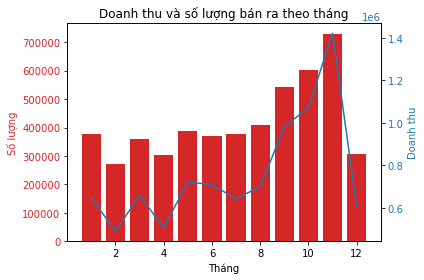

In [15]:
#Biểu đồ kết hợp thể hiện doanh thu và số lượng sản phẩm bán ra theo tháng
import matplotlib.pyplot as plt

Sl = df.groupby('Month')['Quantity'].sum()
Dt = df.groupby('Month')['Total price'].sum()

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Tháng')
ax1.set_ylabel('Số lượng', color=color)
ax1.bar(Sl.index, Sl, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Doanh thu', color=color)
ax2.plot(Dt.index, Dt, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Doanh thu và số lượng bán ra theo tháng')

fig.tight_layout()  
plt.show()

Nhận xét: Do số lượng sản phẩm bán ra tỷ lệ thuận với doanh thu nên nhìn chung, tháng 11 có kết quả kinh doanh cao nhất. Các sản phẩm được bán ra nhiều hơn vào 4 tháng cuối năm

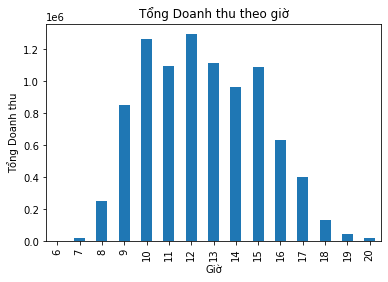

In [16]:
#Biểu đồ cột thể hiện doanh thu theo giờ
df['Hour'] = df['Date'].dt.hour

# Tính tổng doanh thu theo giờ
doanh_thu_theo_gio = df.groupby('Hour')['Total price'].sum()

# Vẽ biểu đồ cột doanh thu theo giờ
doanh_thu_theo_gio.plot(kind='bar', xlabel='Giờ', ylabel='Tổng Doanh thu', title='Tổng Doanh thu theo giờ')
plt.show()

Nhận xét: Dựa vào biểu đồ trên, doanh nghiệp có thể tìm ra xu hướng các khung giờ khách hàng thường xuyên mua sắm (10-15h) để đưa ra các chiến lược tiếp thị phù hợp

2.2 Phân tích theo quốc gia

In [17]:
# Nhóm dữ liệu theo quốc gia và tính tổng doanh thu cho mỗi quốc gia
df_country_revenue = df.groupby('Country')['Total price'].sum().reset_index()

# Sắp xếp theo doanh thu giảm dần và lấy top 10 quốc gia
df_top_10 = df_country_revenue.nlargest(10, 'Total price')

# Hiển thị DataFrame top 10 quốc gia theo doanh thu
print(df_top_10)

           Country  Total price
27  United Kingdom  8042609.084
15     Netherlands   275134.860
6          Germany   192290.750
5           France   176088.430
0        Australia   137138.460
22           Spain    54021.380
24     Switzerland    51862.980
3          Belgium    35327.430
23          Sweden    33005.030
12           Japan    29711.300


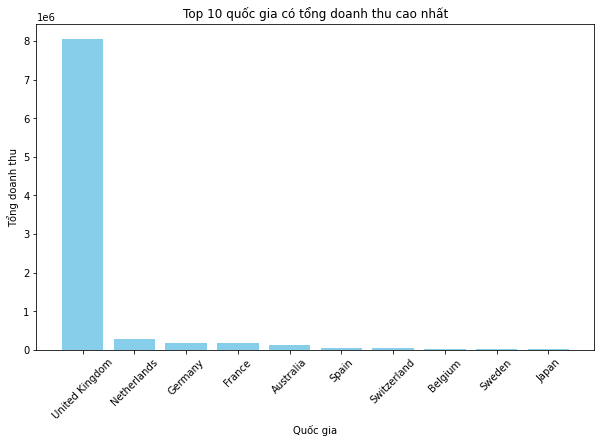

In [18]:
#Biểu đồ cột thể hiện tổng doanh thu của Top 10 quốc gia có doanh thu cao nhất
plt.figure(figsize=(10, 6))
plt.bar(df_top_10['Country'], df_top_10['Total price'], color='skyblue')
plt.xlabel('Quốc gia')
plt.ylabel('Tổng doanh thu')
plt.title('Top 10 quốc gia có tổng doanh thu cao nhất')
plt.xticks(rotation=45)
plt.show()

Nhận xét: Vương quốc Anh là quốc gia có doanh thu cao nhất, chênh lệch rất nhiều với quốc gia thứ 2 là Hà Lan. Doanh nghiệp có thể tập trung đẩy mạnh phát triển ở thị trường này, hoặc nghiên cứu các vấn đề ở những thị trường có doanh thu kém hơn nếu muốn mở rộng thị trường

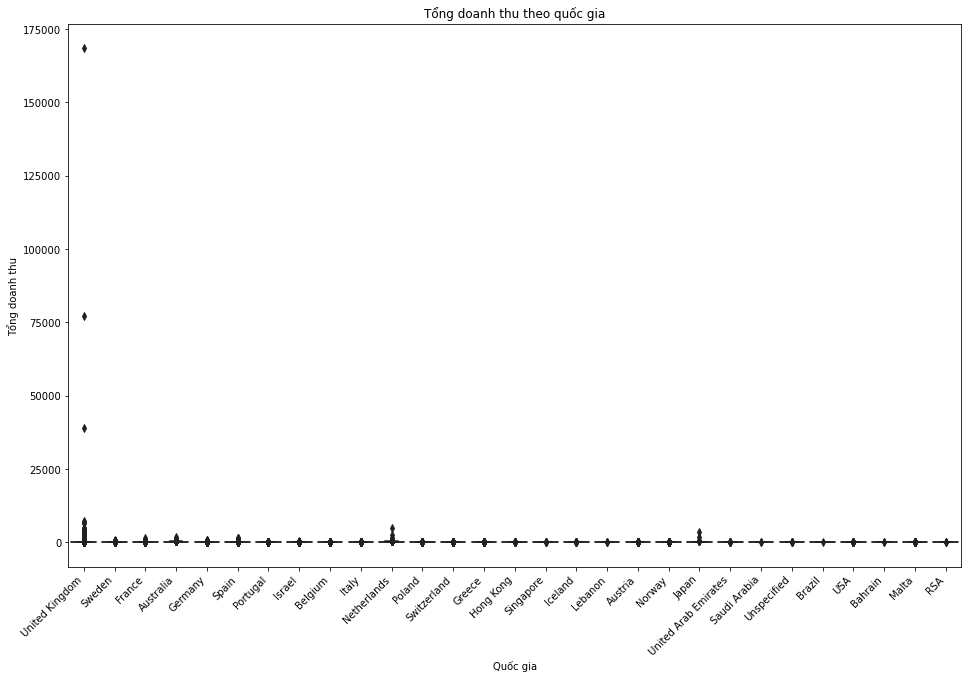

In [19]:
#Biểu đồ Box plot thể hiện tổng doanh thu theo quốc gia
import seaborn as sns
plt.figure(figsize=(16,10))
sns.boxplot(x='Country', y='Total price', data=df, palette='viridis')
plt.title('Tổng doanh thu theo quốc gia')
plt.xlabel('Quốc gia')
plt.ylabel('Tổng doanh thu')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_4676\2072077323.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


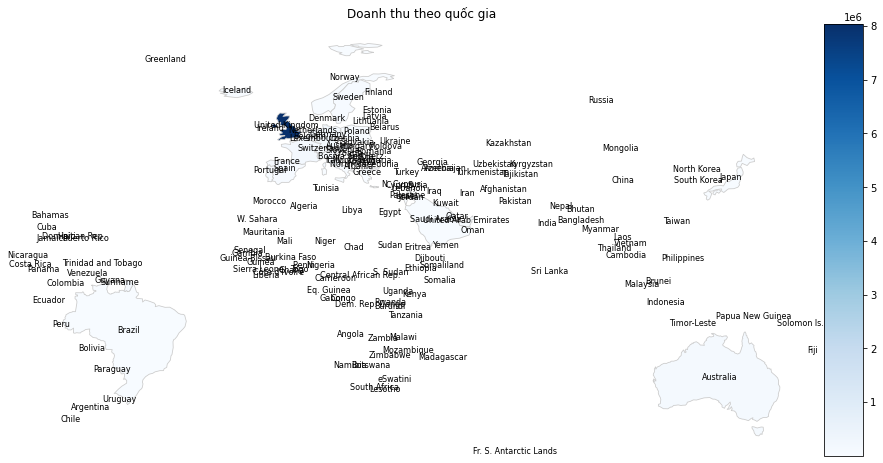

In [20]:
#Biểu đồ địa lý 
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Đọc dữ liệu bản đồ thế giới
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Tạo dữ liệu giả định để thay thế revenue_by_country
revenue_by_country = df.groupby('Country')['Total price'].sum().reset_index()

# Gộp dữ liệu từ DataFrame của bạn với dữ liệu bản đồ thế giới
merged = world.set_index('name').join(revenue_by_country.set_index('Country'))

# Vẽ biểu đồ
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

merged.plot(column='Total price', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax)
# Bổ sung chú thích cho từng quốc gia
for idx, row in merged.iterrows():
    ax.annotate(text=row.name, xy=(row.geometry.centroid.x, row.geometry.centroid.y), horizontalalignment='center', fontsize=8, color='Black')

ax.set_title('Doanh thu theo quốc gia')
ax.set_axis_off()

plt.show()

2.3 Phân tích theo sản phẩm

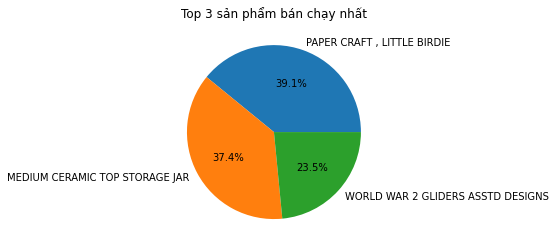

In [21]:
#Biểu đồ tròn top 3 sản phẩm bán chạy nhất
top_3_san_pham = df.groupby('Itemname')['Quantity'].sum().nlargest(3)
top_3_san_pham.plot(kind='pie', autopct='%1.1f%%', title='Top 3 sản phẩm bán chạy nhất')
plt.ylabel('')
plt.show()

2.4 Phân tích khách hàng

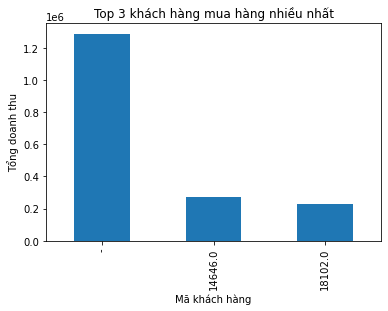

In [22]:
#Biểu đồ top 3 khách hàng mang lại doanh thu cao nhất
top_3_khach_hang = df.groupby('CustomerID')['Total price'].sum().nlargest(3)
top_3_khach_hang.plot(kind='bar', xlabel='Mã khách hàng', ylabel='Tổng doanh thu', title='Top 3 khách hàng mua hàng nhiều nhất')
plt.show()

Nhận xét: Doanh nghiệp có thể đưa ra các chương trình tri ân cho các khách hàng mang lại doanh thu cao nhất

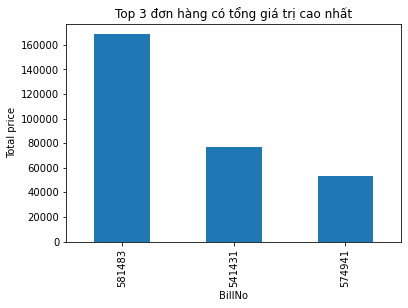

In [23]:
#Biểu đồ top 3 đơn hàng có tổng giá trị cao nhất
top_3_don_hang = df.groupby('BillNo')['Total price'].sum().nlargest(3)
top_3_don_hang.plot(kind='bar', xlabel='BillNo', ylabel='Total price', title='Top 3 đơn hàng có tổng giá trị cao nhất')
plt.show()

# 3. Thuật toán Apriori và FP-Growth

3.1 Apriori

In [24]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [25]:
df1 = df[['BillNo', 'Itemname']]

In [26]:
from collections import defaultdict
# Khởi tạo một từ điển có giá trị mặc định là list
grouped_data = defaultdict(list)

# Lặp qua dữ liệu và nhóm các mục theo giá trị của cột "TTD"
for ttd, item in zip(df1["BillNo"], df1["Itemname"]):
    grouped_data[ttd].append(item)

# Chuyển đổi từ điển thành dạng bạn mong muốn
formatted_data = {"BillNo": [], "Itemname": []}
for ttd, items in grouped_data.items():
    formatted_data["BillNo"].append(ttd)
    formatted_data["Itemname"].append(items)

In [27]:
# Chuyển đổi dữ liệu thành dạng danh sách các giao dịch
transactions = formatted_data["Itemname"]

# Khởi tạo encoder
encoder = TransactionEncoder()

# Fit và chuyển đổi dữ liệu thành dạng ma trận one-hot encoding
onehot = encoder.fit_transform(transactions)

# Tạo DataFrame từ ma trận one-hot encoding
df2 = pd.DataFrame(onehot, columns=encoder.columns_)

In [28]:
df2.head(10)

,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
# Tìm tập phổ biến với max_len=3
frequent_itemsetsap = apriori(df2, min_support=0.03, max_len=3, use_colnames=True)

In [30]:
# In ra tập phổ biến
#frequent_itemsets.head(70)
print(frequent_itemsetsap)

      support                                           itemsets
0    0.048578                           (6 RIBBONS RUSTIC CHARM)
1    0.041079                      (60 TEATIME FAIRY CAKE CASES)
2    0.030445                   (72 SWEETHEART FAIRY CAKE CASES)
3    0.048578                       (ALARM CLOCK BAKELIKE GREEN)
4    0.038561                        (ALARM CLOCK BAKELIKE PINK)
..        ...                                                ...
140  0.038337  (JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)
141  0.033580  (LUNCH BAG  BLACK SKULL., LUNCH BAG RED RETROS...
142  0.031845  (LUNCH BAG PINK POLKADOT, LUNCH BAG RED RETROS...
143  0.031005   (LUNCH BAG SUKI DESIGN, LUNCH BAG RED RETROSPOT)
144  0.031733  (ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...

[145 rows x 2 columns]


In [31]:
# Tìm các quy tắc kết hợp
rules = association_rules(frequent_itemsetsap, metric="lift", min_threshold=1)

# In ra các quy tắc kết hợp và các chỉ số
print(rules)

                            antecedents                          consequents  \
0          (ALARM CLOCK BAKELIKE GREEN)           (ALARM CLOCK BAKELIKE RED)   
1            (ALARM CLOCK BAKELIKE RED)         (ALARM CLOCK BAKELIKE GREEN)   
2   (GARDENERS KNEELING PAD CUP OF TEA)   (GARDENERS KNEELING PAD KEEP CALM)   
3    (GARDENERS KNEELING PAD KEEP CALM)  (GARDENERS KNEELING PAD CUP OF TEA)   
4      (PINK REGENCY TEACUP AND SAUCER)    (GREEN REGENCY TEACUP AND SAUCER)   
5     (GREEN REGENCY TEACUP AND SAUCER)     (PINK REGENCY TEACUP AND SAUCER)   
6     (ROSES REGENCY TEACUP AND SAUCER)    (GREEN REGENCY TEACUP AND SAUCER)   
7     (GREEN REGENCY TEACUP AND SAUCER)    (ROSES REGENCY TEACUP AND SAUCER)   
8             (JUMBO BAG RED RETROSPOT)     (JUMBO  BAG BAROQUE BLACK WHITE)   
9      (JUMBO  BAG BAROQUE BLACK WHITE)            (JUMBO BAG RED RETROSPOT)   
10                   (JUMBO BAG APPLES)            (JUMBO BAG RED RETROSPOT)   
11            (JUMBO BAG RED RETROSPOT) 

3.2 FP-Growth

In [32]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth


# Chuẩn bị dữ liệu thành danh sách giao dịch
transactions = df.groupby('BillNo')['Itemname'].apply(list).values.tolist()

# Sử dụng TransactionEncoder để chuyển đổi danh sách giao dịch thành dạng dữ liệu phù hợp cho FP-growth
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Áp dụng FP-Growth để tìm các mẫu phổ biến
frequent_itemsetsfp = fpgrowth(df_encoded, min_support=0.03, use_colnames=True)

# In các mẫu phổ biến
print(frequent_itemsetsfp)

      support                                           itemsets
0    0.110421               (WHITE HANGING HEART T-LIGHT HOLDER)
1    0.108742                          (JUMBO BAG RED RETROSPOT)
2    0.064641                          (JUMBO BAG PINK POLKADOT)
3    0.054847                           (JAM MAKING SET PRINTED)
4    0.038337                          (RECYCLING BAG RETROSPOT)
..        ...                                                ...
140  0.033636  (PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...
141  0.031733  (ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...
142  0.031005   (LUNCH BAG SUKI DESIGN, LUNCH BAG RED RETROSPOT)
143  0.030278        (JUMBO BAG APPLES, JUMBO BAG RED RETROSPOT)
144  0.030445  (GARDENERS KNEELING PAD CUP OF TEA, GARDENERS ...

[145 rows x 2 columns]


In [33]:
# Tìm các quy tắc kết hợp
rulesfp = association_rules(frequent_itemsetsfp, metric="lift", min_threshold=1)

# In ra các quy tắc kết hợp và các chỉ số
print(rulesfp)

                            antecedents                          consequents  \
0             (JUMBO BAG PINK POLKADOT)            (JUMBO BAG RED RETROSPOT)   
1             (JUMBO BAG RED RETROSPOT)            (JUMBO BAG PINK POLKADOT)   
2          (ALARM CLOCK BAKELIKE GREEN)           (ALARM CLOCK BAKELIKE RED)   
3            (ALARM CLOCK BAKELIKE RED)         (ALARM CLOCK BAKELIKE GREEN)   
4   (JUMBO SHOPPER VINTAGE RED PAISLEY)            (JUMBO BAG RED RETROSPOT)   
5             (JUMBO BAG RED RETROSPOT)  (JUMBO SHOPPER VINTAGE RED PAISLEY)   
6     (ROSES REGENCY TEACUP AND SAUCER)    (GREEN REGENCY TEACUP AND SAUCER)   
7     (GREEN REGENCY TEACUP AND SAUCER)    (ROSES REGENCY TEACUP AND SAUCER)   
8              (JUMBO STORAGE BAG SUKI)            (JUMBO BAG RED RETROSPOT)   
9             (JUMBO BAG RED RETROSPOT)             (JUMBO STORAGE BAG SUKI)   
10            (LUNCH BAG  BLACK SKULL.)            (LUNCH BAG RED RETROSPOT)   
11            (LUNCH BAG RED RETROSPOT) 